In [1]:
import pandas  as pd
import numpy as  np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')
df.sample(5)

,Gender,Height,Weight
3266,Male,73.358383,212.256253
3900,Male,70.647514,201.265591
5679,Female,60.680846,113.642060
419,Male,71.615179,209.670774
6781,Female,57.202660,103.962705


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2288\1012233626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


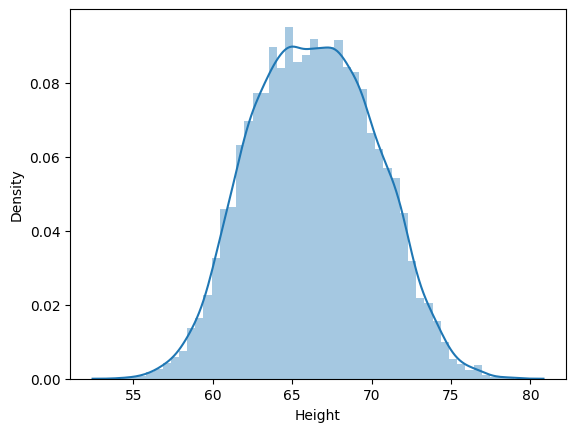

In [7]:
sns.distplot(df['Height'])
plt.show()

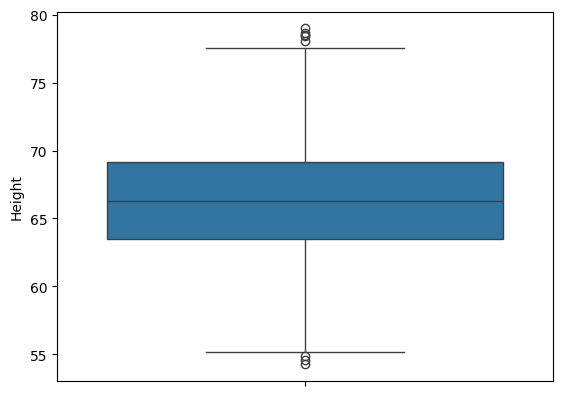

In [9]:
sns.boxplot(df['Height'])
plt.show()  # here in the bouth side we outlies in the data

In [11]:
upper_limit = df['Height'].quantile(0.99)  # here the quantile we take as per my requried mean
upper_limit  # 99% max values  

74.7857900583366

In [12]:
lower_limit = df['Height'].quantile(0.01)  # here the quantile we take as per my requried mean
lower_limit # 1% min values

58.13441158671655

In [16]:
df[(df['Height'] >=74.78) | (df['Height'] <=58.13)]
# here we have the outlies into the dataframe 

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


<br>
 not have the oulties in the data

In [26]:
new_df = df[(df['Height'] <=74.78) & (df['Height'] >=58.1)]
# here we applyed  the tramming in the dataframe which help full outlies removing in the dataframe

In [22]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [24]:
new_df['Height'].describe()

count    9803.000000
mean       66.360142
std         3.647328
min        58.109663
25%        63.573197
50%        66.317573
75%        69.119817
max        74.767447
Name: Height, dtype: float64

In [25]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2288\2047364851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


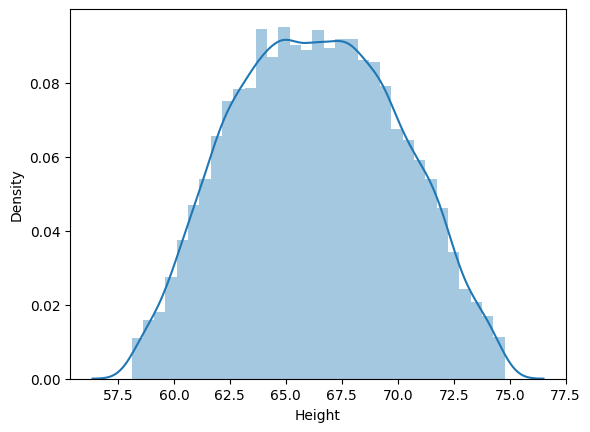

In [28]:
sns.distplot(new_df['Height'])
plt.show()

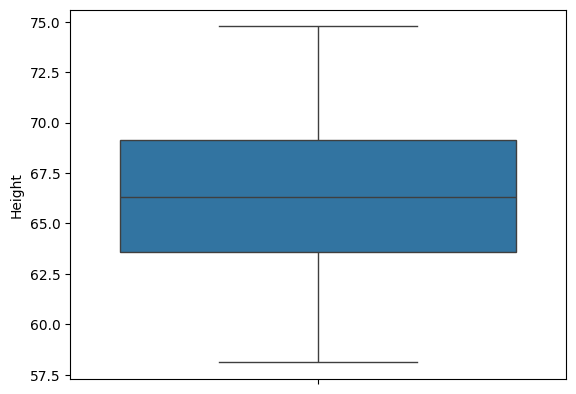

In [29]:
sns.boxplot(new_df['Height'])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2288\283793712.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],color = 'g')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2288\283793712.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'],color = 'r')


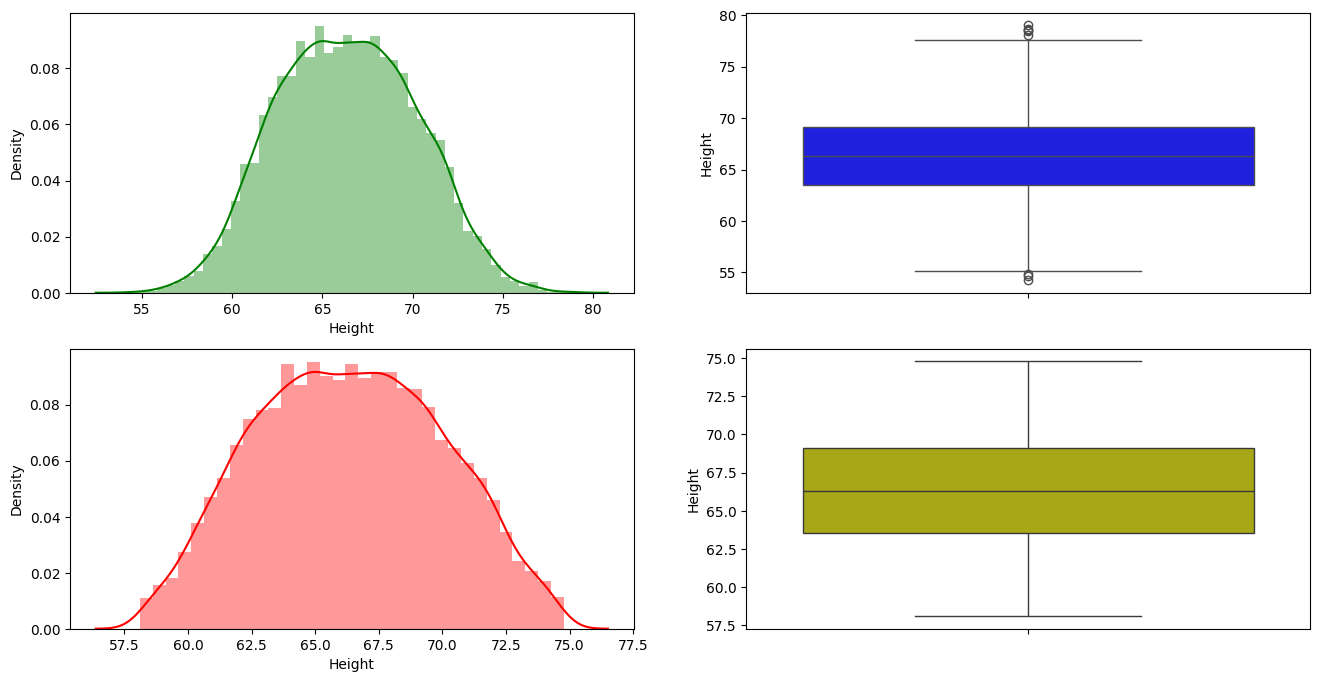

In [31]:
# comparing 

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['Height'],color = 'g')

# plt.figure(figsize = (16,8))
plt.subplot(2,2,2)
sns.boxplot(df['Height'],color = 'b')

plt.subplot(2,2,3)
sns.distplot(new_df['Height'],color = 'r')

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'],color = 'y')
# here due to this here outlies is remove in the given below
plt.show()

<br>
Capping ----> Winsorization

In [32]:
df['Height'] = np.where(df['Height'] >= upper_limit,
                       upper_limit,
             np.where(df['Height'] <= lower_limit,
              lower_limit,
              df['Height']))

In [33]:
df.shape

(10000, 3)

In [35]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [34]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
